In [198]:
import uproot
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split

In [191]:
with uproot.open("ch3t_sr1.root") as f:
    arr = f["Events"].arrays(cut = 'S1_corrected_area > 0', library = 'pd')

In [192]:
arr.head()

,runID,evtID,S2_area,S2_btm_area,S2_top_area,S2_TBA,S2_corrected_area,S2_XY_corrected_area,S2_width_ns,S2_peakAmp,...,S2_rmsWidth_ns,S2_fwhm_ns,S2_x_cm,S2_y_cm,S2_xy_chiSq,S2_n_saturated,has_good_S1,drift_time,S1_area,S1_corrected_area
1,8135,82510,186696.234375,56513.230469,130182.921875,0.394597,238570.812500,6.588514,13210.0,57.565643,...,1074.0,3050.0,-50.071304,-12.595337,5.003135,0.0,True,0.0,57323.050781,47940.609375
2,8135,82520,78.904518,26.663769,52.191383,0.323728,94.203354,0.002537,1510.0,0.146897,...,321.0,840.0,8.814517,26.112101,1.780685,0.0,True,0.0,3098.078613,2671.013184
3,8135,82525,432699.750000,136250.546875,296449.406250,0.370231,494962.906250,14.452450,12660.0,111.949219,...,1193.0,3900.0,-32.554398,2.414943,9.031620,0.0,True,0.0,2335.334473,2288.260010
5,8135,82537,505076.000000,164505.703125,340570.156250,0.348590,555800.000000,17.586535,3490.0,375.725708,...,387.0,1360.0,16.394835,-30.837593,6.550779,0.0,True,0.0,1220.329102,1304.582275
6,8135,82549,680541.312500,213399.015625,467142.062500,0.372855,741306.437500,22.620752,3300.0,493.790680,...,373.0,1390.0,40.913544,21.131460,54.538105,0.0,True,0.0,633.057129,675.012024


<AxesSubplot:>

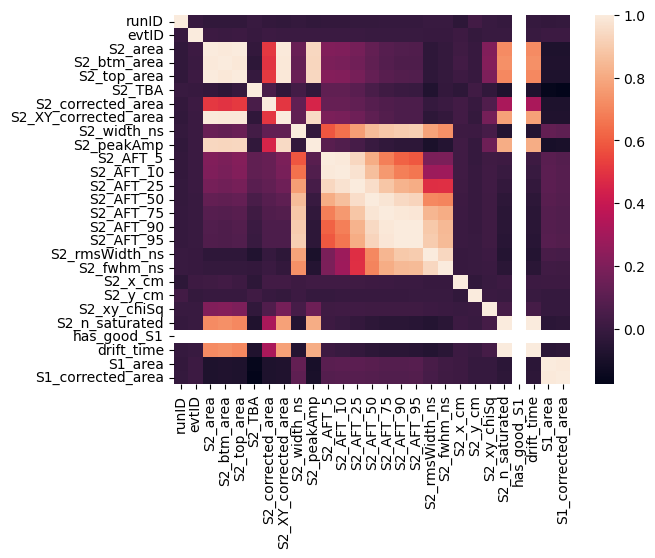

In [193]:
#plot everything against everything - corner plots n that 
corr_df = arr.corr()

corr_df.dropna()

sns.heatmap(corr_df,
           xticklabels = corr_df.columns,
           yticklabels=corr_df.columns,
           )




In [194]:
corr_df_cut=corr_df
for idx1 in corr_df.index:
    for idx2 in corr_df.index:
        if corr_df[idx1][idx2]>0.05:
            a=False
        else:
            a=True
        
    if a: 
        corr_df_cut=corr_df_cut.drop(index=idx1)
        corr_df_cut=corr_df_cut.drop(columns=idx1)
        
corr_df_cut

,S2_width_ns,S2_AFT_5,S2_AFT_10,S2_AFT_25,S2_AFT_50,S2_AFT_75,S2_AFT_90,S2_AFT_95,S1_area,S1_corrected_area
S2_width_ns,1.000000,0.582916,0.650244,0.768700,0.856075,0.888876,0.902780,0.908621,0.122410,0.111192
S2_AFT_5,0.582916,1.000000,0.993049,0.937969,0.809329,0.685977,0.612849,0.589206,0.095112,0.084518
S2_AFT_10,0.650244,0.993049,1.000000,0.970213,0.865482,0.754575,0.685902,0.663318,0.099926,0.088241
S2_AFT_25,0.768700,0.937969,0.970213,1.000000,0.957200,0.881918,0.826966,0.807101,0.100906,0.088620
S2_AFT_50,0.856075,0.809329,0.865482,0.957200,1.000000,0.977163,0.944323,0.929283,0.091931,0.080728
S2_AFT_75,0.888876,0.685977,0.754575,0.881918,0.977163,1.000000,0.990293,0.981686,0.082498,0.072557
S2_AFT_90,0.902780,0.612849,0.685902,0.826966,0.944323,0.990293,1.000000,0.998270,0.082527,0.073371
S2_AFT_95,0.908621,0.589206,0.663318,0.807101,0.929283,0.981686,0.998270,1.000000,0.086663,0.077688
S1_area,0.122410,0.095112,0.099926,0.100906,0.091931,0.082498,0.082527,0.086663,1.000000,0.994548
S1_corrected_area,0.111192,0.084518,0.088241,0.088620,0.080728,0.072557,0.073371,0.077688,0.994548,1.000000


,S2_width_ns,S2_AFT_5,S2_AFT_10,S2_AFT_25,S2_AFT_50,S2_AFT_75,S2_AFT_90,S2_AFT_95,S1_area,S1_corrected_area
S2_width_ns,1.000000,0.582916,0.650244,0.768700,0.856075,0.888876,0.902780,0.908621,0.122410,0.111192
S2_AFT_5,0.582916,1.000000,0.993049,0.937969,0.809329,0.685977,0.612849,0.589206,0.095112,0.084518
S2_AFT_10,0.650244,0.993049,1.000000,0.970213,0.865482,0.754575,0.685902,0.663318,0.099926,0.088241
S2_AFT_25,0.768700,0.937969,0.970213,1.000000,0.957200,0.881918,0.826966,0.807101,0.100906,0.088620
S2_AFT_50,0.856075,0.809329,0.865482,0.957200,1.000000,0.977163,0.944323,0.929283,0.091931,0.080728
S2_AFT_75,0.888876,0.685977,0.754575,0.881918,0.977163,1.000000,0.990293,0.981686,0.082498,0.072557
S2_AFT_90,0.902780,0.612849,0.685902,0.826966,0.944323,0.990293,1.000000,0.998270,0.082527,0.073371
S2_AFT_95,0.908621,0.589206,0.663318,0.807101,0.929283,0.981686,0.998270,1.000000,0.086663,0.077688
S1_area,0.122410,0.095112,0.099926,0.100906,0.091931,0.082498,0.082527,0.086663,1.000000,0.994548
S1_corrected_area,0.111192,0.084518,0.088241,0.088620,0.080728,0.072557,0.073371,0.077688,0.994548,1.000000


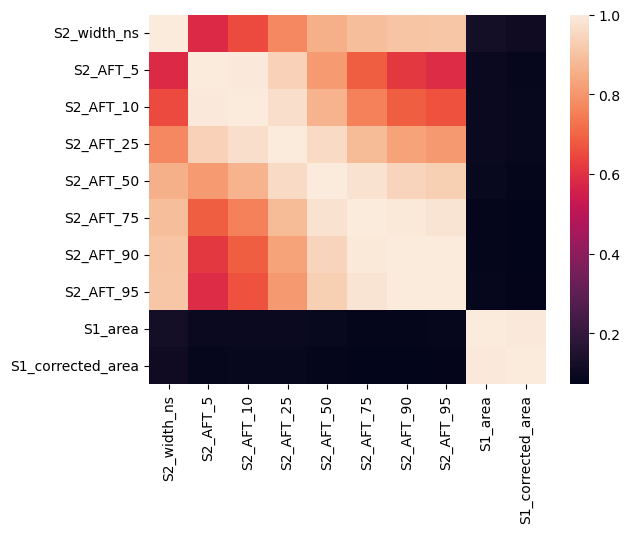

In [195]:
sns.heatmap(corr_df_cut,
           xticklabels = corr_df_cut.columns,
           yticklabels=corr_df_cut.columns,
           )

corr_df_cut

In [196]:
 def train_model(X_train,y_train,X_test,y_test):
    model = xgb.XGBClassifier('binary:logistic', missing = np.nan, seed = 42, max_delta_step = 1)

    model.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'logloss',
            eval_set = [(X_test,y_test)]
            )

    model.save_model('BDT_model_'+str(THRESHOLD))

    return model

In [203]:
seed = 42
test_size = 0.2
y = ['S1_area']
X = ['S1_corrected_area']
#Creating the three different data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8, random_state=seed, stratify = True)
model = train_model(X_train,y_train,X_test,y_test)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Boosted Descision Tree')
y_score_test = model.predict_proba(X_test)[:,1]
y_score_train = model.predict_proba(X_train)[:,1]
false_positive_rate_test, true_positive_rate_test, threshold_test = roc_curve(y_test, y_score_test)
false_positive_rate_train, true_positive_rate_train, threshold_train = roc_curve(y_train, y_score_train)
plt.plot(false_positive_rate_test, true_positive_rate_test, label = "Testing Dataset. roc_auc_score - {}".format(roc_auc_score(y_test, y_score_test)))
plt.plot(false_positive_rate_train, true_positive_rate_train, label = "Training Dataset. roc_auc_score - {}".format(roc_auc_score(y_train, y_score_train)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig("Overfitting_Graphs/Overfitting_combo_graph.jpg", bbox_inches="tight", pad_inches=0, format="jpg", dpi=600)
plt.show()

ValueError: With n_samples=1, test_size=0.2 and train_size=0.8, the resulting train set will be empty. Adjust any of the aforementioned parameters.

,S2_width_ns,S2_AFT_5,S2_AFT_10,S2_AFT_25,S2_AFT_50,S2_AFT_75,S2_AFT_90,S2_AFT_95,S1_area,S1_corrected_area
S2_width_ns,1.000000,0.582916,0.650244,0.768700,0.856075,0.888876,0.902780,0.908621,0.122410,0.111192
S2_AFT_5,0.582916,1.000000,0.993049,0.937969,0.809329,0.685977,0.612849,0.589206,0.095112,0.084518
S2_AFT_10,0.650244,0.993049,1.000000,0.970213,0.865482,0.754575,0.685902,0.663318,0.099926,0.088241
S2_AFT_25,0.768700,0.937969,0.970213,1.000000,0.957200,0.881918,0.826966,0.807101,0.100906,0.088620
S2_AFT_50,0.856075,0.809329,0.865482,0.957200,1.000000,0.977163,0.944323,0.929283,0.091931,0.080728
S2_AFT_75,0.888876,0.685977,0.754575,0.881918,0.977163,1.000000,0.990293,0.981686,0.082498,0.072557
S2_AFT_90,0.902780,0.612849,0.685902,0.826966,0.944323,0.990293,1.000000,0.998270,0.082527,0.073371
S2_AFT_95,0.908621,0.589206,0.663318,0.807101,0.929283,0.981686,0.998270,1.000000,0.086663,0.077688
S1_area,0.122410,0.095112,0.099926,0.100906,0.091931,0.082498,0.082527,0.086663,1.000000,0.994548
S1_corrected_area,0.111192,0.084518,0.088241,0.088620,0.080728,0.072557,0.073371,0.077688,0.994548,1.000000


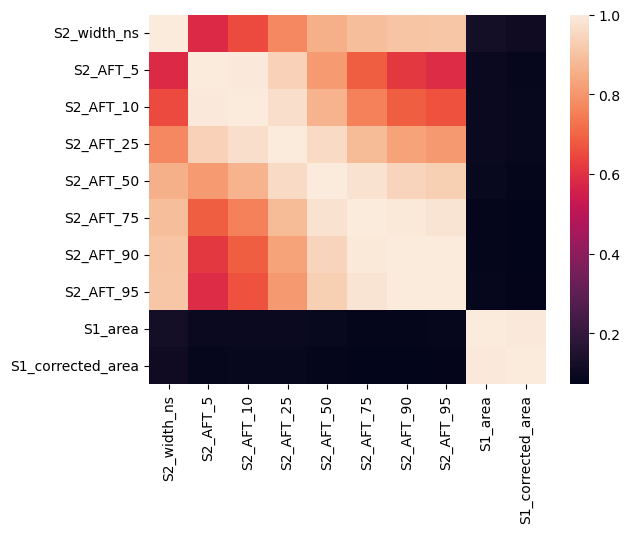

NameError: name 'train_test_split' is not defined